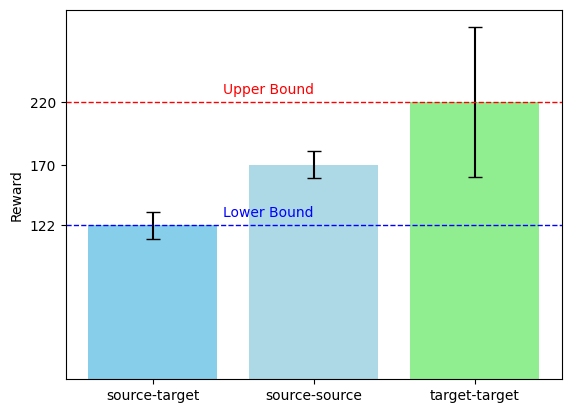

In [250]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

test_log_dir = os.path.join(os.getcwd(), "test_logs")
lower_bound = os.path.join(test_log_dir, "ppo_source_test_on_target.txt")
upper_bound = os.path.join(test_log_dir, "ppo_target_test_on_target.txt")
source_source = os.path.join(test_log_dir, "ppo_source_test_on_source.txt")
file_paths = [lower_bound, source_source, upper_bound]
test_mean_str = []
test_var =  []


for i in range(len(file_paths)):
    file = open(file_paths[i], 'r')
    content = file.read()
    test_mean_str.append(re.search(r'\d+\.\d+', content.split("\n")[2]).group())
    test_var.append(re.search(r'\d+\.\d+', content.split("\n")[3]).group())
    file.close()
test_mean = [float(x)/10 for x in test_mean_str]
test_var = [float(x)/10 for x in test_var]
h = len(test_mean)

labels = ['source-target', 'source-source', 'target-target']
LOWER_BOUND = test_mean[0]
UPPER_BOUND = test_mean[2]
plt.bar( range(h), test_mean, tick_label=labels, yerr=test_var, capsize=5, color=['skyblue', 'lightblue', 'lightgreen'])
plt.axhline(y=LOWER_BOUND, color='blue', linestyle='--', linewidth=1)
plt.text(1, LOWER_BOUND+1, 'Lower Bound', color='blue', fontsize=10, va='center', ha='right')
plt.axhline(y=UPPER_BOUND, color='red', linestyle='--', linewidth=1)
plt.text(1, UPPER_BOUND+1, 'Upper Bound', color='red', fontsize=10, va='center', ha='right')

# plt.title('sim-to-real bounds')
plt.ylabel('Reward')
plt.yticks(test_mean, [f"{int(float(x))}" for x in test_mean_str])

plt.show()


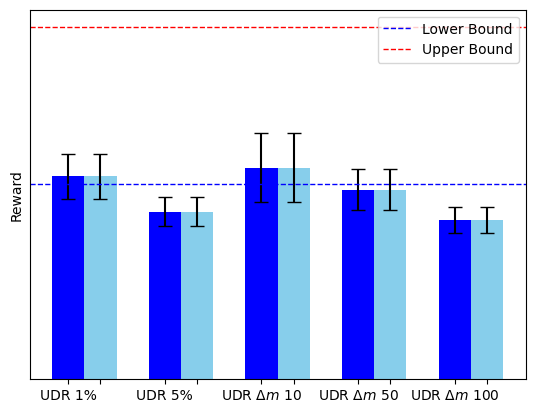

In [260]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

test_log_dir = os.path.join(os.getcwd(), "test_logs")
file_paths = [
    os.path.join(test_log_dir, "ppo_udr_01_perc_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_05_perc_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_10_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_50_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_100_test_on_target.txt")
]
test_mean_str = []
test_var =  []


for i in range(len(file_paths)):
    file = open(file_paths[i], 'r')
    content = file.read()
    test_mean_str.append(re.search(r'\d+\.\d+', content.split("\n")[2]).group())
    test_var.append(re.search(r'\d+\.\d+', content.split("\n")[3]).group())
    file.close()
test_mean = [float(x)/10 for x in test_mean_str]
test_var = [float(x)/10 for x in test_var]
h = len(test_mean) 

### TODO
train_mean = test_mean.copy()
train_var = test_var.copy()
###


# plot
labels = ['UDR 1%', '', 'UDR 5%', '', r'UDR $\Delta m$ 10', '', r'UDR $\Delta m$ 50', '', r'UDR $\Delta m$ 100', '']
color = ['skyblue' if i % 2 else 'blue' for i in range(h*2)]
w = 1
height = [train_mean[int(i/2)] if i%2 else test_mean[int(i/2)] for i in range(h*2) ]
yerr = [train_var[int(i/2)] if i%2 else test_var[int(i/2)] for i in range(h*2) ]

plt.bar( [0,1*w,3*w,4*w,6*w,7*w,9*w,10*w,12*w,13*w], height, tick_label=labels, yerr=yerr, capsize=5, color=color, width=w)

plt.axhline(y=LOWER_BOUND, color='blue', linestyle='--', linewidth=1, label='Lower Bound')
# plt.text(1, LOWER_BOUND+1, 'Lower Bound', color='blue', fontsize=10, va='center', ha='right')
plt.axhline(y=UPPER_BOUND, color='red', linestyle='--', linewidth=1, label='Upper Bound')
# plt.text(1, UPPER_BOUND-1, 'Upper Bound', color='red', fontsize=10, va='center', ha='right')

# plt.title('sim-to-real bounds')
plt.ylabel('Reward')
# plt.yticks(test_mean, [f"{int(float(x))}" for x in test_mean_str])
plt.yticks([])
plt.xticks()
plt.legend()

plt.show()


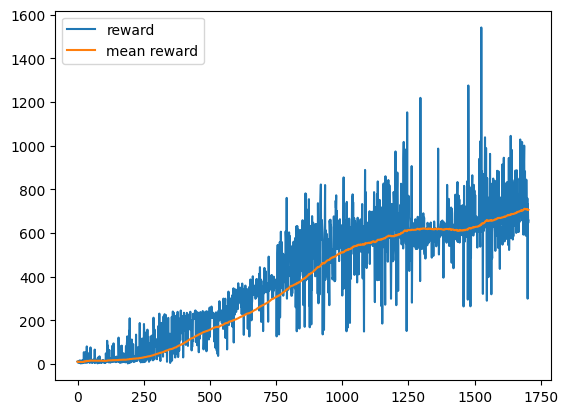

([10.722988,
  11.56124,
  5.736791,
  7.547455,
  10.900141,
  9.391874,
  10.4977,
  4.567579,
  15.889664,
  8.095167,
  3.482441,
  11.412938,
  15.070956,
  1.944706,
  4.83301,
  8.22673,
  15.267592,
  4.282447,
  12.124125,
  3.225678,
  5.154085,
  17.722935,
  6.183736,
  12.525031,
  53.547441,
  11.760161,
  28.454392,
  6.643878,
  4.577722,
  52.700618,
  10.227666,
  8.007387,
  10.582493,
  6.988629,
  13.772071,
  80.094248,
  5.438615,
  6.374476,
  7.470134,
  21.658803,
  13.138669,
  15.054934,
  15.392863,
  14.681374,
  18.62357,
  51.414533,
  4.431753,
  16.086184,
  8.876873,
  75.532286,
  13.744019,
  7.416308,
  8.002067,
  12.865564,
  10.220674,
  4.423203,
  9.547285,
  7.884016,
  7.324155,
  19.703604,
  14.862462,
  15.9161,
  15.329649,
  6.313697,
  7.485015,
  65.61635,
  3.990536,
  18.880815,
  21.899662,
  8.518373,
  9.464407,
  17.437364,
  7.269731,
  12.169887,
  17.297952,
  11.298596,
  2.585884,
  28.898045,
  6.87256,
  6.138331,
  5.258

In [43]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import csv

def plot_train_reward(file, plot=False):
    with open(file, newline="", encoding="ISO-8859-1") as filecsv:
        lettore = csv.reader(filecsv,delimiter=";")
        next(lettore) #skip header
        next(lettore)
        reward = []
        mean_reward = []
        for i, row in enumerate(lettore):
            r = float(row[0].split(',')[0])
            reward.append(r)
            r_mean = np.mean(reward[max(0, i-200):])
            mean_reward.append(r_mean)
    if plot:
        plt.plot(reward, label='reward')
        plt.plot(mean_reward, label='mean reward')
        plt.legend()
        plt.show()

    return reward, mean_reward


train_log_dir = os.path.join(os.getcwd(), "train_logs")
file = os.path.join(train_log_dir, "ppo_source.monitor.csv")

plot_train_reward(file, True)   